# INFO6105 FINAL PROJECT - DATA SCIENCE METHODS AND TOOLS

### TOPIC - MUSIC RECOMMENDATION SYSTEM


In [1]:
#Import all required packages


import numpy as np
import pandas as pd
import re 
import math as math
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")

#### Loading the Spotify dataset

In [2]:
song_dataset = pd.read_csv(r'tracks.csv')
song_dataset.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
song_dataset[song_dataset['id'] == '6m1iAs1A3GepruWO4tuCu6']

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1067,6m1iAs1A3GepruWO4tuCu6,Row! Row! Rosie,0,170480,0,['George Olsen'],['45tQpWrlBy4DMpfAriqfcC'],1924-01-01,0.813,0.266,10,-12.964,1,0.0515,0.977,0.205,0.0866,0.882,111.349,4


#### Loading another dataset that has genres  

In [4]:
data_w_genre = pd.read_csv(r'data_w_genres.csv')
data_w_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


#### Checking all the columns in the Spotify dataset

In [5]:
song_dataset.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

#### Checking all the columns in the genre dataset

In [6]:
data_w_genre.columns

Index(['artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'genres'],
      dtype='object')

#### Exploring the features and their datatypes

In [7]:
song_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [8]:
data_w_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27621 entries, 0 to 27620
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           27621 non-null  object 
 1   acousticness      27621 non-null  float64
 2   danceability      27621 non-null  float64
 3   duration_ms       27621 non-null  float64
 4   energy            27621 non-null  float64
 5   instrumentalness  27621 non-null  float64
 6   liveness          27621 non-null  float64
 7   loudness          27621 non-null  float64
 8   speechiness       27621 non-null  float64
 9   tempo             27621 non-null  float64
 10  valence           27621 non-null  float64
 11  popularity        27621 non-null  float64
 12  key               27621 non-null  int64  
 13  mode              27621 non-null  int64  
 14  count             27621 non-null  int64  
 15  genres            27621 non-null  object 
dtypes: float64(11), int64(3), object(2)
memo

#### Describing the features and their aggregates

In [9]:
song_dataset.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [10]:
data_w_genre.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
count,27621.000000,27621.000000,2.762100e+04,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000,27621.000000
mean,0.504651,0.544411,2.374886e+05,0.493708,0.166661,0.203603,-11.222480,0.096180,115.439232,0.516032,34.288478,5.409942,0.767170,14.313493
std,0.369788,0.176098,1.209766e+05,0.253566,0.292133,0.140311,5.819377,0.116062,25.138470,0.243304,22.104194,3.485676,0.422643,53.867027
min,0.000000,0.000000,1.879550e+04,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.128784,0.429000,1.819730e+05,0.282000,0.000004,0.111667,-14.097000,0.039500,98.725500,0.334000,13.511111,2.000000,1.000000,2.000000
50%,0.493000,0.555667,2.176930e+05,0.501000,0.001610,0.162850,-10.135333,0.052644,114.950000,0.528500,39.000000,6.000000,1.000000,3.000000
75%,0.901000,0.673000,2.660000e+05,0.699000,0.188000,0.247371,-6.906000,0.098000,129.612647,0.705000,51.000000,8.000000,1.000000,9.000000
max,0.996000,0.986000,5.403500e+06,1.000000,1.000000,0.991000,1.342000,0.964000,217.743000,0.991000,95.000000,11.000000,1.000000,3172.000000


#### Checking the datatypes of features in both the datasets.

In [11]:
song_dataset.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [12]:
data_w_genre.dtypes

artists              object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
mode                  int64
count                 int64
genres               object
dtype: object

## Data Preprocessing and Exploratory Data Analysis

#### Converting the genre names in the 'genres' column into a format with underscores replacing spaces.

In [13]:

data_w_genre['genres_upd'] = data_w_genre['genres'].apply(lambda x: [re.sub(' ','_',i) for i in re.findall(r"'([^']*)'", x)])

In [14]:
data_w_genre

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres,genres_upd
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes'],[show_tunes]
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[],[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[],[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[],[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27616,鳳飛飛,0.884000,0.358000,259387.000000,0.208000,0.000002,0.150000,-9.524000,0.033900,131.261000,0.278000,35.000000,10,1,2,"['c-pop', 'classic mandopop', 'vintage chinese...","[c-pop, classic_mandopop, vintage_chinese_pop]"
27617,黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,47.000000,9,0,2,"['c-pop', 'classic cantopop', 'classic mandopop']","[c-pop, classic_cantopop, classic_mandopop]"
27618,黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,20.000000,5,1,11,[],[]
27619,黃蜀娟,0.925143,0.322262,212989.857143,0.141490,0.000189,0.196757,-19.256714,0.055571,111.685381,0.267033,23.000000,10,1,42,[],[]


#### Finding the null values

In [15]:
song_dataset.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

#### Removing the null values

In [16]:

song_dataset.dropna(inplace=False)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [17]:
data_w_genre.isna().sum()

artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
mode                0
count               0
genres              0
genres_upd          0
dtype: int64

#### Checking for any duplicates

In [18]:
song_dataset.duplicated().sum()

0

#### Checking unique values

In [19]:
song_dataset.nunique()

id                  586672
name                446474
popularity             101
duration_ms         123122
explicit                 2
artists             114030
id_artists          115062
release_date         19700
danceability          1285
energy                2571
key                     12
loudness             29196
mode                     2
speechiness           1655
acousticness          5217
instrumentalness      5402
liveness              1782
valence               1805
tempo               122706
time_signature           5
dtype: int64

In [20]:
song_dataset.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

#### Taking out numerical and categorical features

In [21]:
numeric_features = [feature for feature in song_dataset.columns if song_dataset[feature].dtype != 'O']
categorical_features = [feature for feature in song_dataset.columns if song_dataset[feature].dtype == 'O']
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

We have 5 categorical features : ['id', 'name', 'artists', 'id_artists', 'release_date']


#### Extracting Year of release of songs

In [22]:
song_dataset['release_year'] = pd.to_numeric(song_dataset['release_date'].str.extract(r'(\d{4})')[0], errors='coerce')
song_dataset.drop('release_date', axis=1, inplace=True)
song_dataset.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922


#### Extract all substrings that are enclosed in single quotes (')

In [23]:
song_dataset['artists_upd1'] = song_dataset['artists'].apply(lambda x: re.findall(r"'([^']*)'", x))
song_dataset['artists_upd1'].values[0][0]

'Uli'

#### Extracts substrings enclosed in double quotes (")

In [24]:
song_dataset['artists_upd_v2'] = song_dataset['artists'].apply(lambda x: re.findall('\"(.*?)\"',x))

#### Merging the results from the above two steps, prioritizing the data extracted using the first method (single quotes) and falling back to the second method (double quotes) when necessary.

In [25]:
song_dataset['artists_upd'] = np.where(song_dataset['artists_upd1'].apply(lambda x: not x), song_dataset['artists_upd_v2'], song_dataset['artists_upd1'] )

In [26]:
song_dataset.iloc[0]

id                      35iwgR4jXetI318WEWsa1Q
name                                     Carve
popularity                                   6
duration_ms                             126903
explicit                                     0
artists                                ['Uli']
id_artists          ['45tIt06XoI0Iio4LBEVpls']
danceability                             0.645
energy                                   0.445
key                                          0
loudness                               -13.338
mode                                         1
speechiness                              0.451
acousticness                             0.674
instrumentalness                         0.744
liveness                                 0.151
valence                                  0.127
tempo                                  104.851
time_signature                               3
release_year                              1922
artists_upd1                             [Uli]
artists_upd_v

#### If artists_upd contains lists of artists, explode will create a new row for each element in these lists, duplicating the values of the other column (id) as needed. This process "flattens" the data, making it easier to work with each artist separately.

In [27]:
artists_exploded = song_dataset[['artists_upd','id']].explode('artists_upd')

#### This line merges artists_exploded with another DataFrame data_w_genre using a left join 

In [28]:
artists_exploded_enriched = artists_exploded.merge(data_w_genre, how = 'left', left_on = 'artists_upd',right_on = 'artists')

#### This line filters the merged DataFrame artists_exploded_enriched to remove rows where the genres_upd column is null. The ~ operator is used for negation, so this operation keeps only the rows where genres_upd has a non-null value.

In [29]:
artists_exploded_enriched_nonnull = artists_exploded_enriched[~artists_exploded_enriched.genres_upd.isnull()]

#### This line groups the non-null DataFrame by the id column, and for each group, it aggregates the genres_upd values into a list.

In [30]:

artists_genres_consolidated = artists_exploded_enriched_nonnull.groupby('id')['genres_upd'].apply(list).reset_index()


#### Consolidating all the genre information for each id into a unique list of genres, eliminating any duplicates.

In [31]:
artists_genres_consolidated['consolidates_genre_lists'] = artists_genres_consolidated['genres_upd'].apply(lambda x: list(set(list(itertools.chain.from_iterable(x)))))

In [32]:
artists_genres_consolidated.head()

,id,genres_upd,consolidates_genre_lists
0,000G1xMMuwxNHmwVsBdtj1,"[[candy_pop, dance_rock, new_romantic, new_wav...","[new_wave, power_pop, rock, new_wave_pop, perm..."
1,000Npgk5e2SgwGaIsN3ztv,"[[classic_bollywood, classic_pakistani_pop, fi...","[indian_folk, sufi, classic_pakistani_pop, fil..."
2,000P83HDtOHcNVFZy7Q2Yu,"[[boogaloo, latin_jazz, salsa, salsa_puertorri...","[boogaloo, latin_jazz, salsa_puertorriquena, t..."
3,000ZxLGm7jDlWCHtcXSeBe,"[[boogie-woogie, piano_blues, ragtime, stride]]","[piano_blues, boogie-woogie, ragtime, stride]"
4,000jBcNljWTnyjB4YO7ojf,[[]],[]


#### Merging two pandas DataFrames: song_dataset and a subset of artists_genres_consolidated

In [33]:
song_dataset = song_dataset.merge(artists_genres_consolidated[['id','consolidates_genre_lists']], on = 'id',how = 'left')

#### Removing NaN from consolidated genre list

In [34]:
song_dataset['consolidates_genre_lists'] = song_dataset['consolidates_genre_lists'].apply(lambda d: d if isinstance(d, list) else [])

In [35]:
song_dataset = song_dataset.drop(['artists', 'artists_upd1', 'artists_upd_v2'], axis=1)

In [36]:
song_dataset.head()

,id,name,popularity,duration_ms,explicit,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,artists_upd,consolidates_genre_lists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['45tIt06XoI0Iio4LBEVpls'],0.645,0.4450,0,-13.338,...,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,[Uli],"[corridos_tumbados, regional_mexican_pop]"
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['14jtPCOoNZwquk5wd9DxrY'],0.695,0.2630,0,-22.136,...,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,[Fernando Pessoa],[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['5LiOoJbxVSAMkBS2fUm3X2'],0.434,0.1770,1,-21.180,...,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,[Ignacio Corsini],"[tango, vintage_tango]"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['5LiOoJbxVSAMkBS2fUm3X2'],0.321,0.0946,7,-27.961,...,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,[Ignacio Corsini],"[tango, vintage_tango]"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['3BiJGZsyX9sJchTqcSA7Su'],0.402,0.1580,3,-16.900,...,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,[Dick Haymes],"[lounge, big_band, deep_adult_standards, adult..."


## Feature Engineering

#### Scaling to normalize feature scales for machine learning models

In [37]:
scaler = MinMaxScaler()
song_dataset[['danceability', 'explicit', 'energy','key','mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']] = scaler.fit_transform(song_dataset[['danceability', 'explicit', 'energy','key','mode', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']])

song_dataset.head()

,id,name,popularity,duration_ms,explicit,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,artists_upd,consolidates_genre_lists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0.0,['45tIt06XoI0Iio4LBEVpls'],0.650858,0.4450,0.000000,0.713748,...,0.464470,0.676707,0.7440,0.151,0.127,0.425564,3,1922,[Uli],"[corridos_tumbados, regional_mexican_pop]"
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0.0,['14jtPCOoNZwquk5wd9DxrY'],0.701312,0.2630,0.000000,0.579173,...,0.985582,0.800201,0.0000,0.148,0.655,0.414029,1,1922,[Fernando Pessoa],[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0.0,['5LiOoJbxVSAMkBS2fUm3X2'],0.437941,0.1770,0.090909,0.593796,...,0.052729,0.997992,0.0218,0.212,0.457,0.529335,5,1922,[Ignacio Corsini],"[tango, vintage_tango]"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0.0,['5LiOoJbxVSAMkBS2fUm3X2'],0.323915,0.0946,0.636364,0.490073,...,0.051905,0.998996,0.9180,0.104,0.397,0.689907,3,1922,[Ignacio Corsini],"[tango, vintage_tango]"
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0.0,['3BiJGZsyX9sJchTqcSA7Su'],0.405651,0.1580,0.272727,0.659263,...,0.040165,0.992972,0.1300,0.311,0.196,0.418945,4,1922,[Dick Haymes],"[lounge, big_band, deep_adult_standards, adult..."


In [38]:
song_dataset['popularity'].describe()

count    586672.000000
mean         27.570053
std          18.370642
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

#### Histogram visualising how the popularity of songs is distributed across the dataset

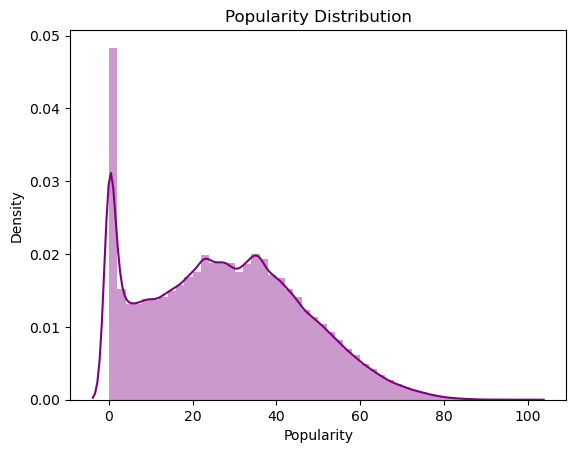

In [39]:
sns.distplot(song_dataset['popularity'], color = 'purple')

plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()


#### We conclude that a substantial number of songs have a moderate popularity level, while many songs have low popularity scores

#### Displaying songs by year

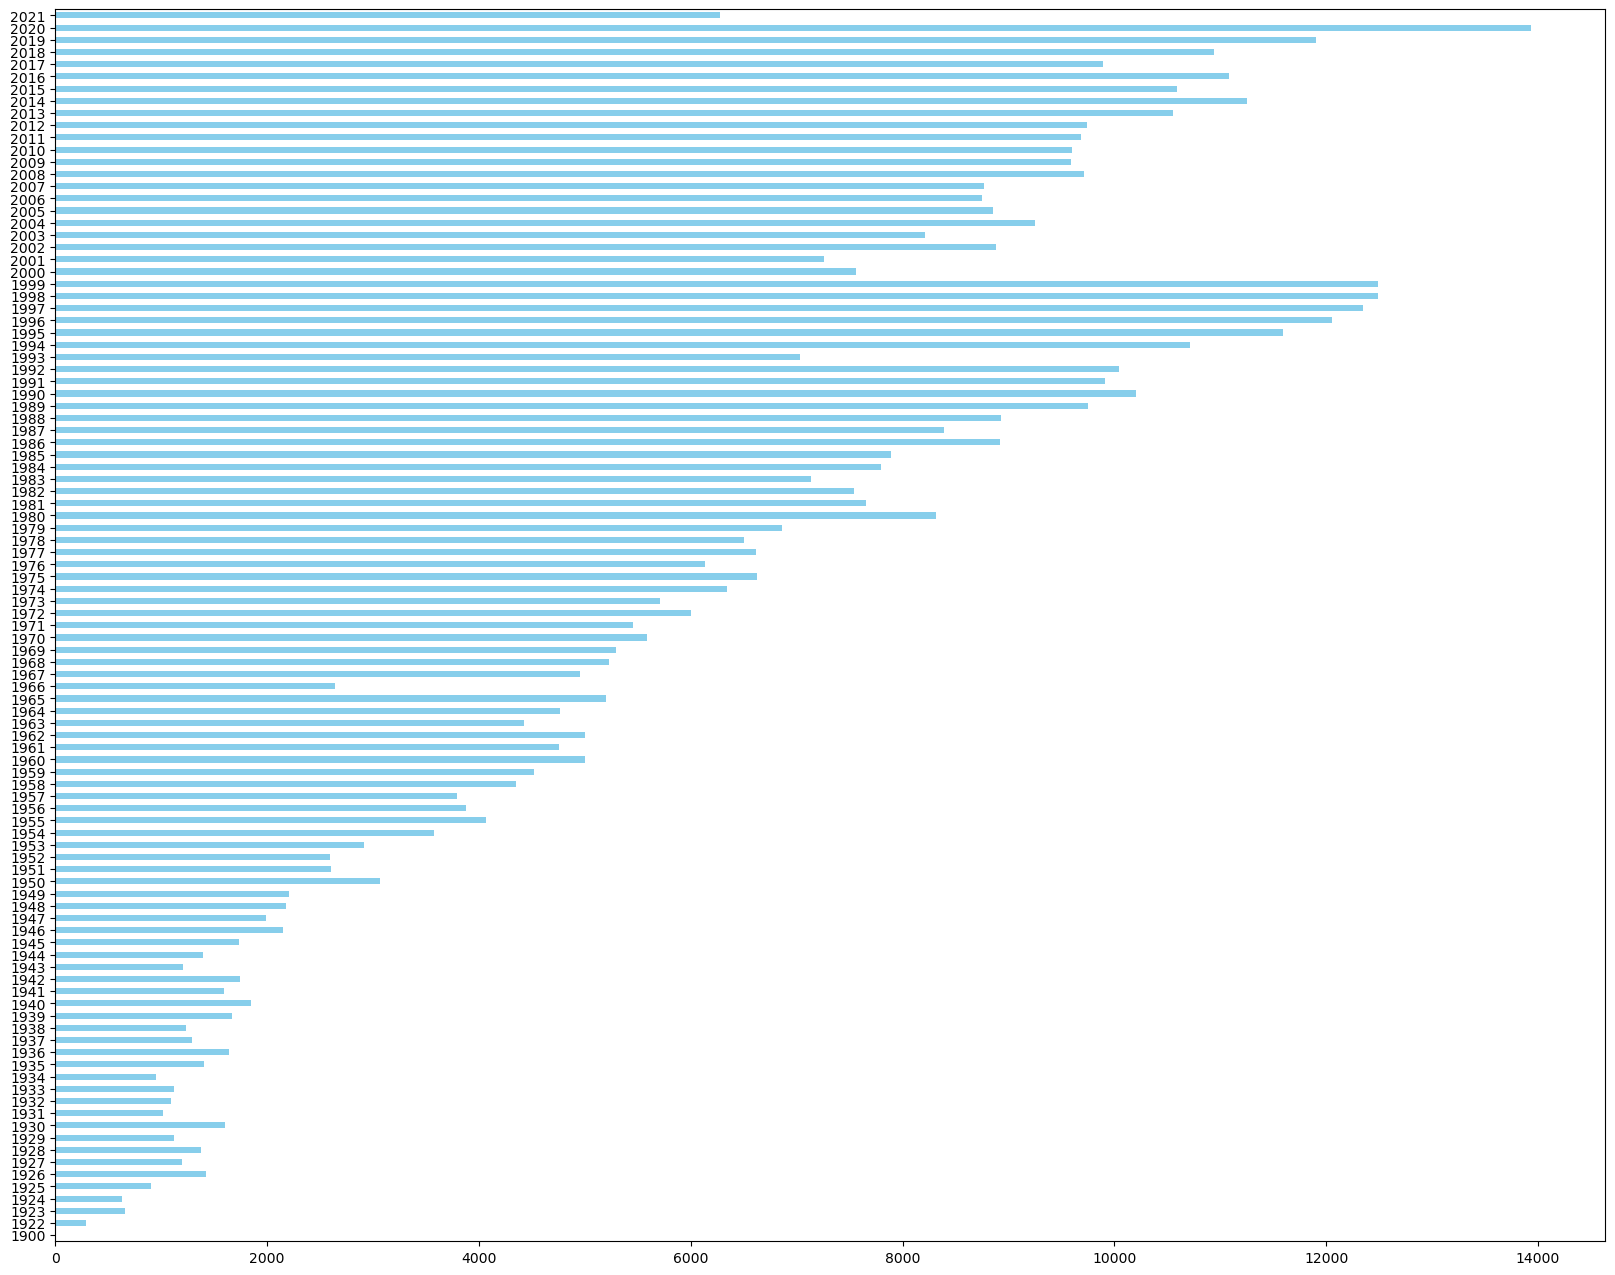

In [40]:

song_dataset.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(20,16), color = 'skyblue')
plt.show()


#### Box Plot of the numeric features in the dataset

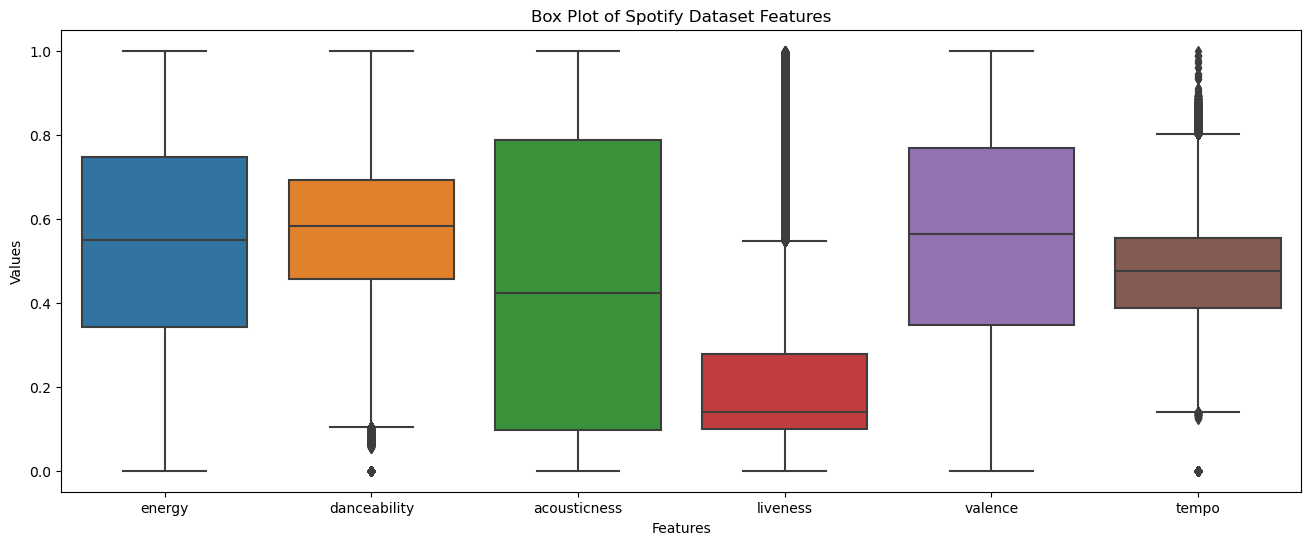

In [41]:
columns_to_check = ['energy','danceability', 'acousticness', 'liveness','valence', 'tempo']
plt.figure(figsize=(16, 6))
sns.boxplot(data=song_dataset[columns_to_check])

plt.title('Box Plot of Spotify Dataset Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.show()

#### Based on the box-plots, we can infer that liveness and tempo have the most outliers

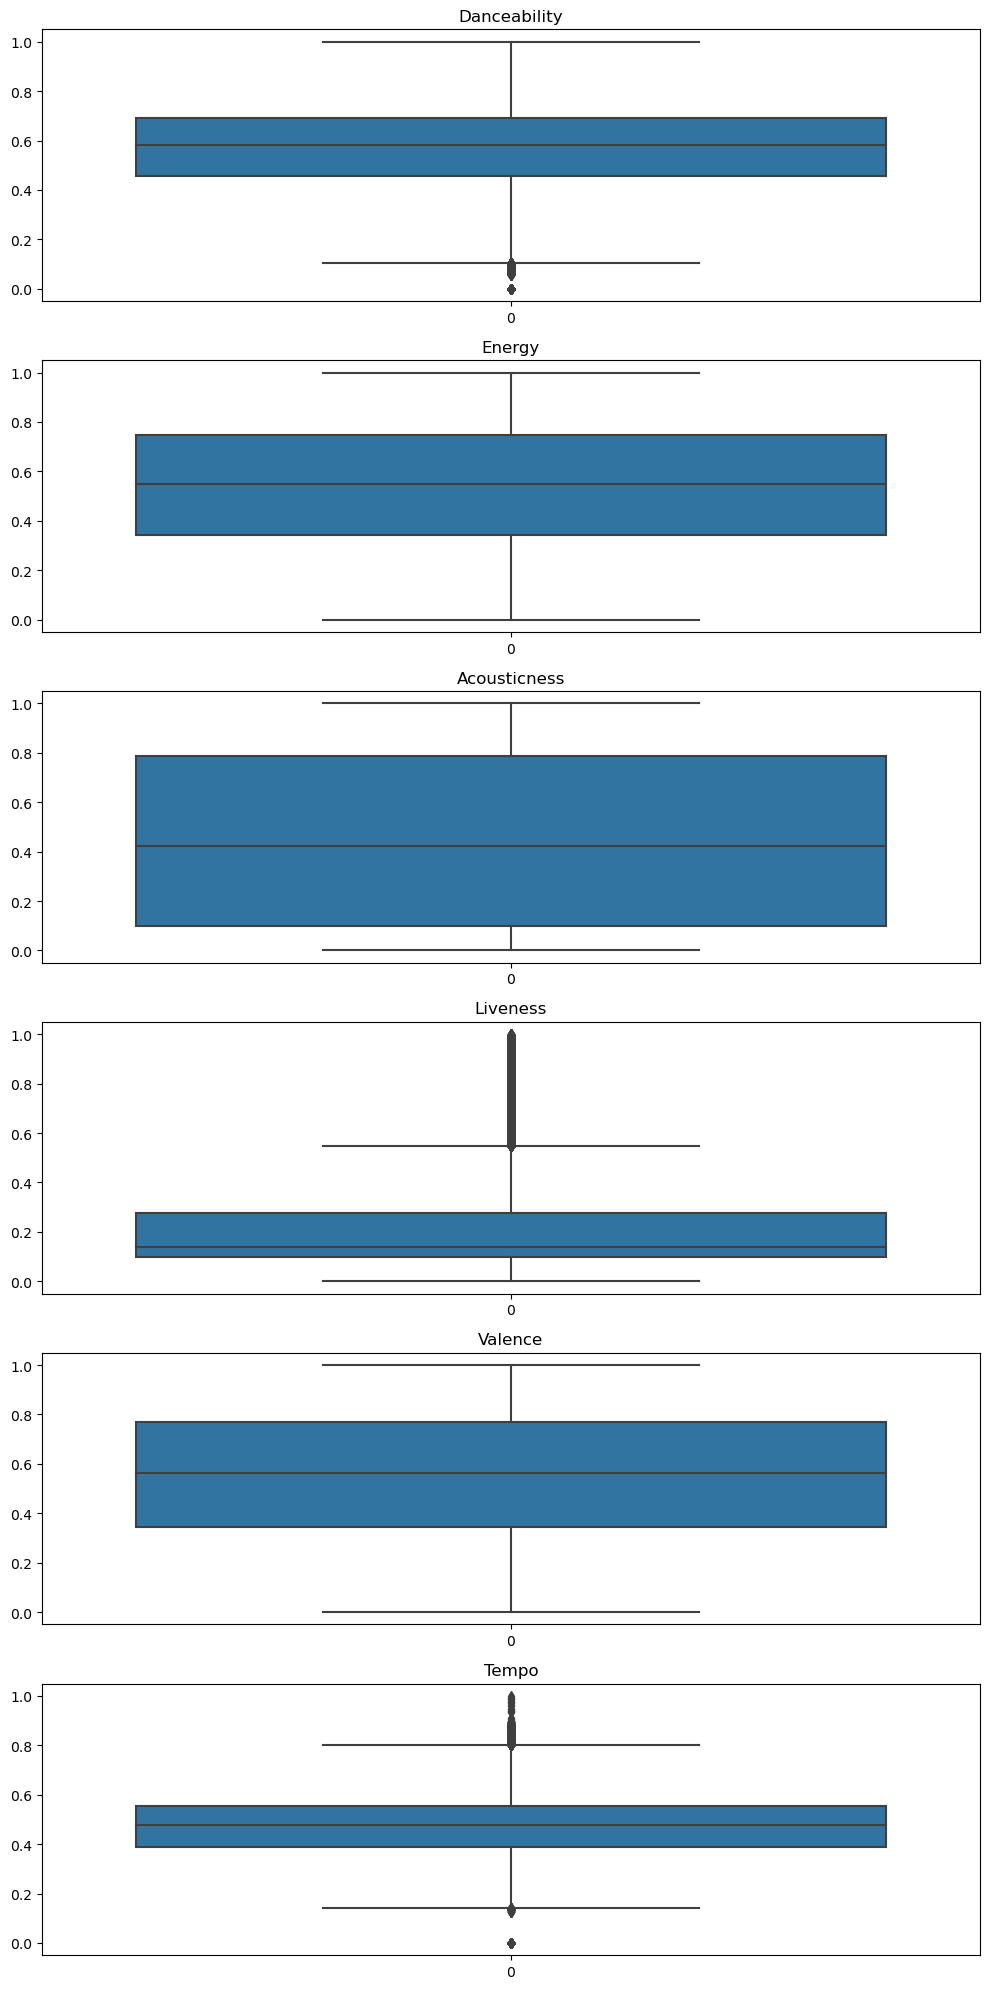

In [42]:
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 20))

# Create each boxplot on a separate subplot
sns.boxplot(data=song_dataset['danceability'], ax=axes[0])
sns.boxplot(data=song_dataset['energy'], ax=axes[1])
sns.boxplot(data=song_dataset['acousticness'], ax=axes[2])
sns.boxplot(data=song_dataset['liveness'], ax=axes[3])
sns.boxplot(data=song_dataset['valence'], ax=axes[4])
sns.boxplot(data=song_dataset['tempo'], ax=axes[5])

# Set titles for each subplot for clarity
axes[0].set_title('Danceability')
axes[1].set_title('Energy')
axes[2].set_title('Acousticness')
axes[3].set_title('Liveness')
axes[4].set_title('Valence')
axes[5].set_title('Tempo')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()

#### Defining a function to remove outliers 

In [43]:
def outliers(song_dataset, ft):
    Q1 = song_dataset[ft].quantile(0.25)
    Q3 = song_dataset[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 = 1.5 * IQR
    ls = song_dataset.index[(song_dataset[ft] < lower_bound) | (song_dataset[ft] > upper_bound)]
    return ls
index_list = []
for feature in ['liveness']:
    index_list.extend(outliers(song_dataset, feature))
def remove(song_dataset, ls):
    ls = sorted(set(ls))
    song_dataset = song_dataset.drop(ls)
    return song_dataset

spotify_df = remove(song_dataset, index_list)

In [44]:
spotify_df

,id,name,popularity,duration_ms,explicit,id_artists,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,artists_upd,consolidates_genre_lists
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0.0,['45tIt06XoI0Iio4LBEVpls'],0.650858,0.4450,0.000000,0.713748,...,0.464470,0.676707,0.744000,0.1510,0.1270,0.425564,3,1922,[Uli],"[corridos_tumbados, regional_mexican_pop]"
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0.0,['14jtPCOoNZwquk5wd9DxrY'],0.701312,0.2630,0.000000,0.579173,...,0.985582,0.800201,0.000000,0.1480,0.6550,0.414029,1,1922,[Fernando Pessoa],[]
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0.0,['5LiOoJbxVSAMkBS2fUm3X2'],0.437941,0.1770,0.090909,0.593796,...,0.052729,0.997992,0.021800,0.2120,0.4570,0.529335,5,1922,[Ignacio Corsini],"[tango, vintage_tango]"
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0.0,['5LiOoJbxVSAMkBS2fUm3X2'],0.323915,0.0946,0.636364,0.490073,...,0.051905,0.998996,0.918000,0.1040,0.3970,0.689907,3,1922,[Ignacio Corsini],"[tango, vintage_tango]"
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0.0,['3BiJGZsyX9sJchTqcSA7Su'],0.229062,0.2610,0.454545,0.728968,...,0.039341,0.997992,0.247000,0.0977,0.0539,0.482549,4,1922,[Dick Haymes],"[lounge, big_band, deep_adult_standards, adult..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586666,1ZwZsVZUiyFwIHMNpI3ERt,Skyscraper,4,106002,0.0,['4USdOnfLczwUglA3TrdHs2'],0.631685,0.5300,0.454545,0.717129,...,0.029248,0.113454,0.856000,0.1040,0.2150,0.487509,4,2020,[Emilie Chin],[]
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0.0,['1QLBXKM5GCpyQQSVMNZqrZ'],0.565086,0.5180,0.000000,0.803491,...,0.030072,0.788153,0.000000,0.0648,0.2110,0.535333,4,2020,[阿YueYue],[]
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0.0,['1dy5WNgIKQU6ezkpZs4y8z'],0.771948,0.6630,0.000000,0.837876,...,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,4,2020,[ROLE MODEL],"[bedroom_pop, pop, indie_pop, indie_r&b, indie..."
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0.0,['37M5pPGs6V1fchFJSgCguX'],0.539859,0.3140,0.636364,0.721626,...,0.042019,0.898594,0.000150,0.0874,0.0663,0.588905,4,2020,[FINNEAS],"[la_indie, pop, indie_pop, electropop]"


#### Filtering to focus the analysis on tracks that have a certain level of popularity, that is well-known or widely recognized. As the dataset is too large computation cost/time will be too high so, we will show the implementation of the recommendation system by using the more popular songs.

In [45]:
spotify_df = spotify_df[spotify_df['popularity'] > 50]
spotify_df['popularity'].count()

55239

#### Plotting a heatmap using correlation matrix to show how each feature is correlated with others.

<Axes: >

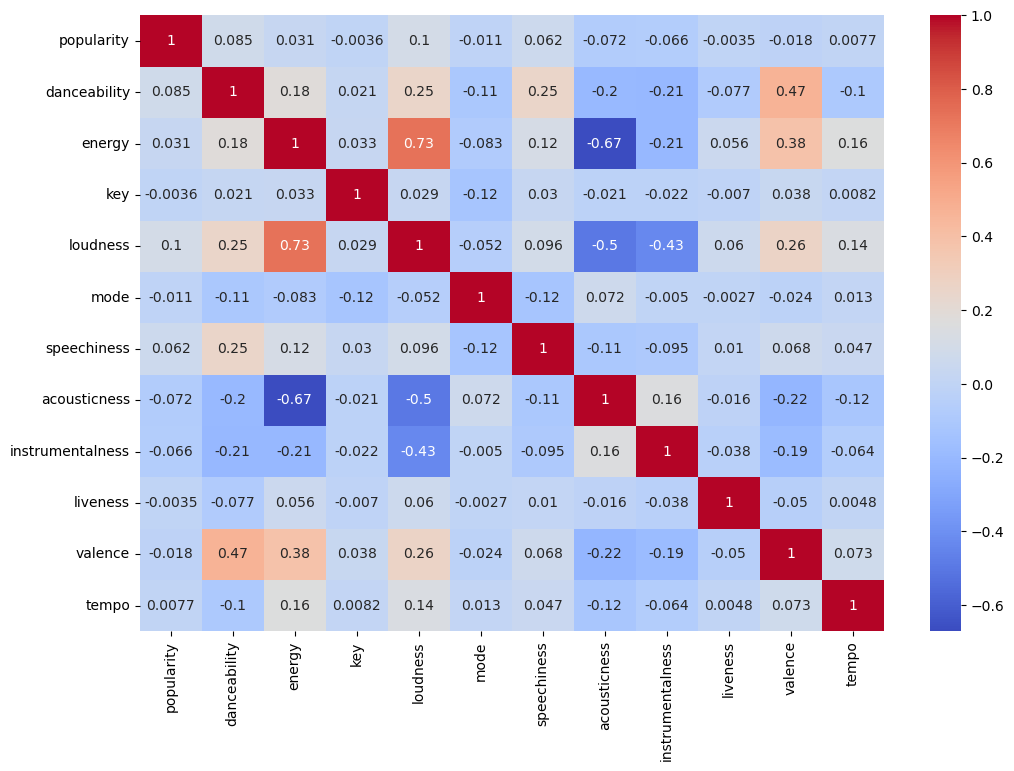

In [46]:
features = ['popularity','danceability', 'energy', 'key','loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness','valence', 'tempo']

correlation_matrix = spotify_df[features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

#there is likely a strong positive correlation between 'energy' and 'loudness

#### Plotting a histogram for each feature to visualize their distributions and identify patterns or anomalies

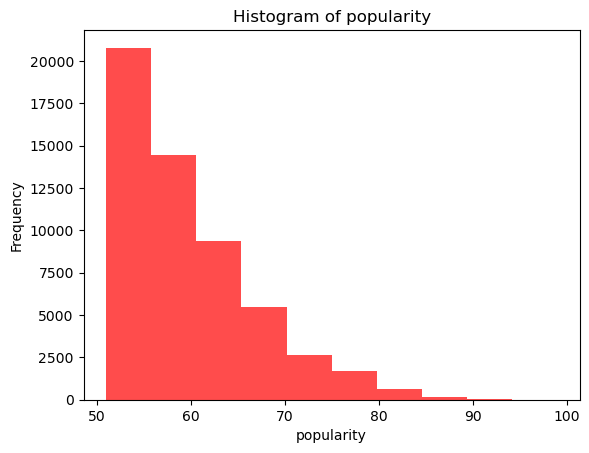

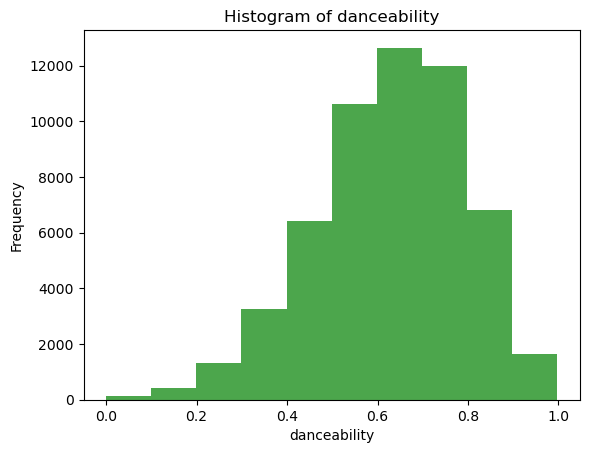

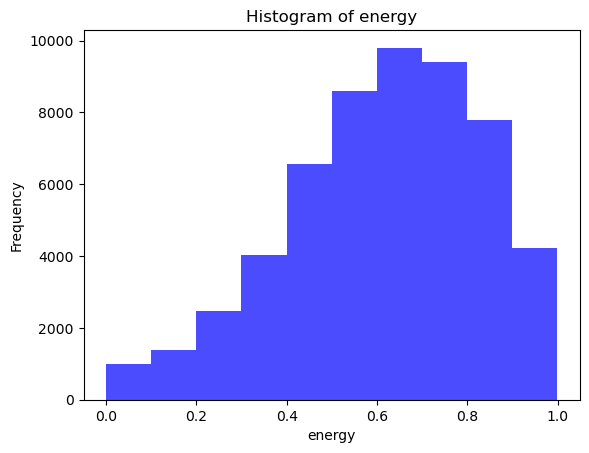

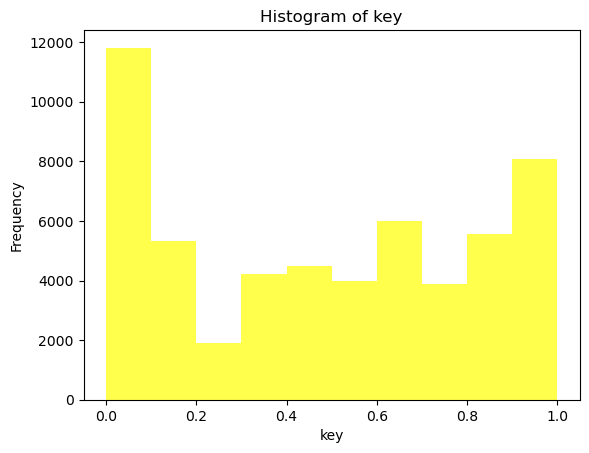

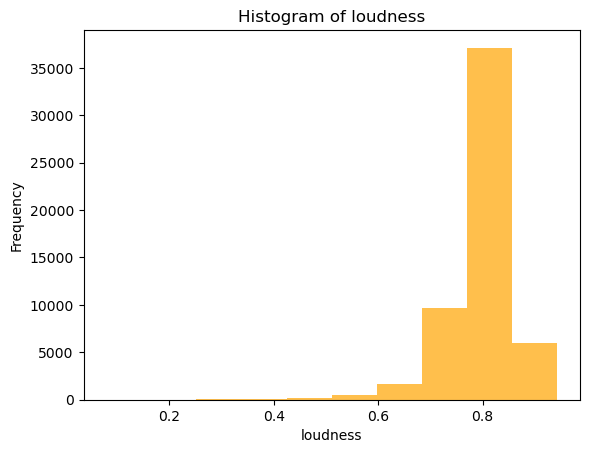

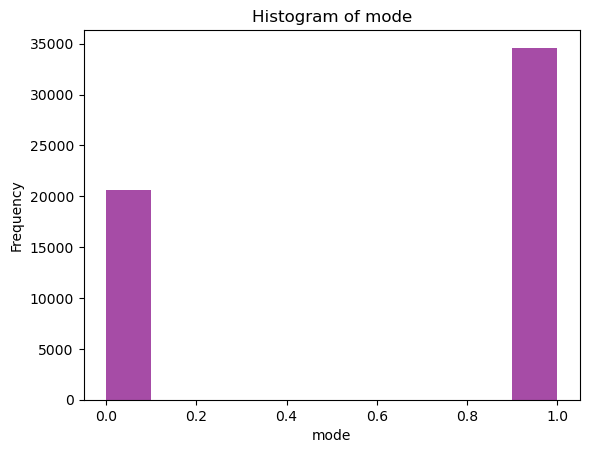

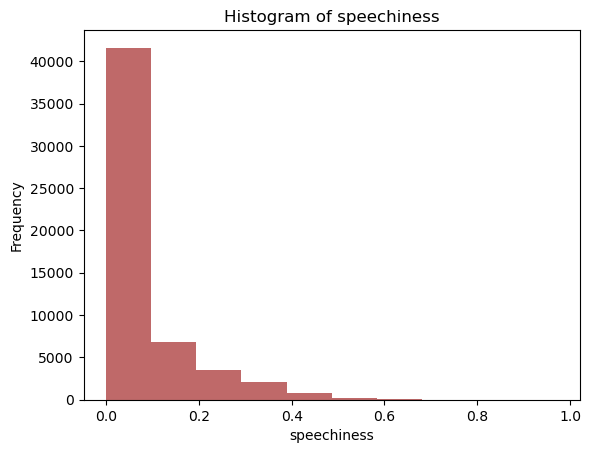

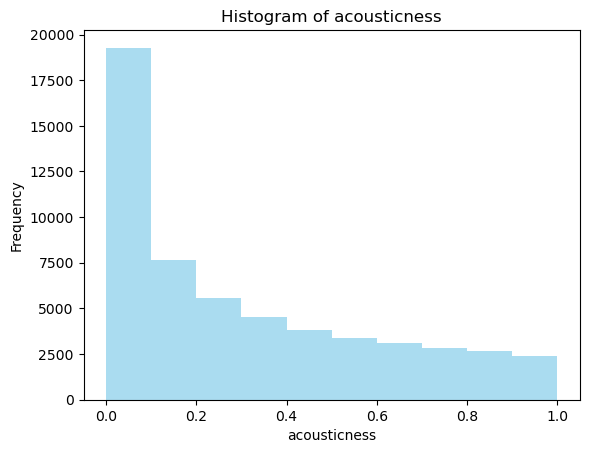

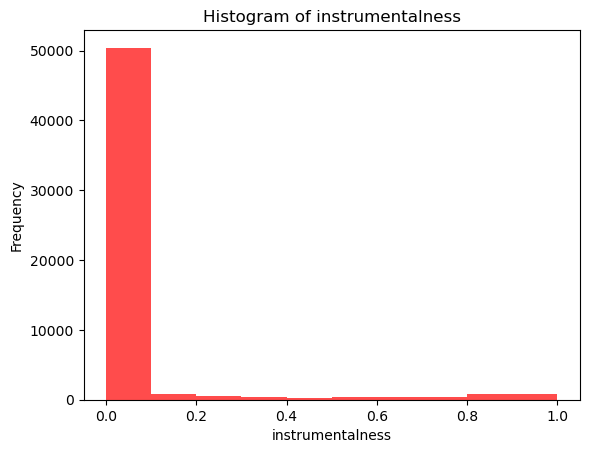

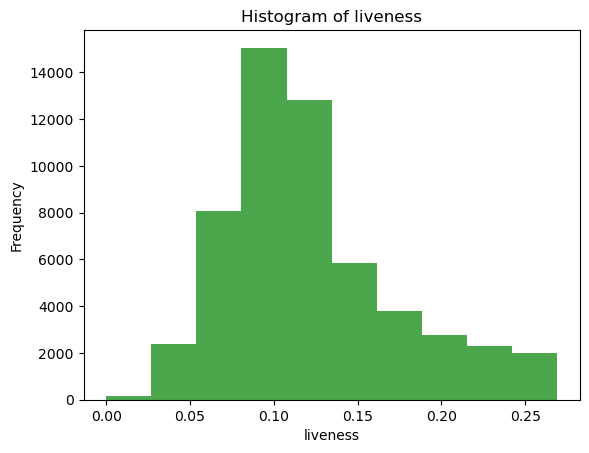

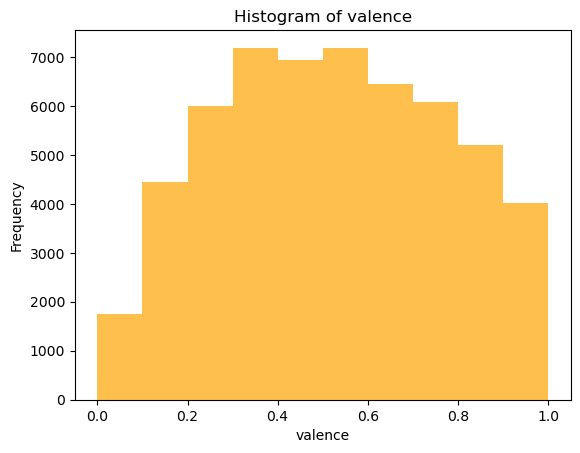

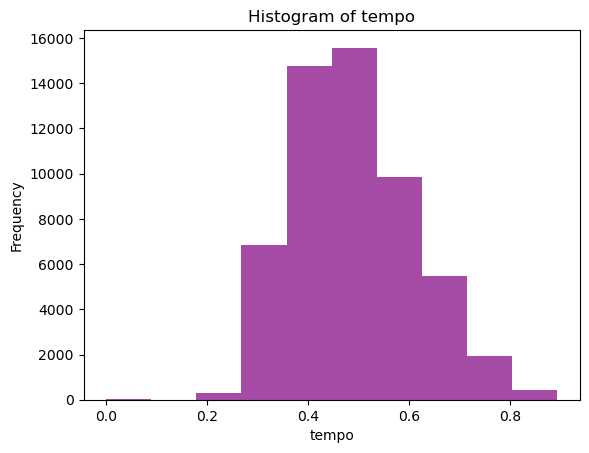

In [47]:
num_data = spotify_df[['popularity','danceability', 'energy', 'key','loudness', 'mode','speechiness','acousticness','instrumentalness','liveness','valence', 'tempo']]

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'brown','skyblue','red','green','orange','purple']

for column, color in zip(num_data, colors):
    plt.hist(num_data[column], color=color, alpha=0.7)  # alpha for transparency
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

#### Dropping these columns as they are less relavant to be used for recommendation.

In [48]:
spotify_df = spotify_df.drop(['id_artists','time_signature', 'duration_ms',  'mode'], axis=1)
spotify_df

,id,name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,artists_upd,consolidates_genre_lists
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,0.0,0.519677,0.2220,0.000000,0.658988,0.059217,0.824297,0.001930,0.1900,0.3500,0.399211,1926,[Fats Waller],"[lounge, jazz_piano, tin_pan_alley, dixieland,..."
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,0.0,0.631685,0.7440,0.181818,0.777212,0.068177,0.850402,0.892000,0.1450,0.2590,0.459114,1928,[Benny Goodman],"[lounge, jazz_clarinet, big_band, adult_standa..."
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,0.0,0.508577,0.0644,0.181818,0.692089,0.042019,0.975904,0.000004,0.1740,0.4030,0.434262,1933,[Billie Holiday],"[lounge, soul, torch_song, adult_standards, vo..."
8096,0Otf1ZfYNIjhqFIuJk0fsy,Tea for Two,53,0.0,0.361251,0.4520,0.090909,0.718612,0.035736,0.994980,0.864000,0.1400,0.5250,0.677702,1933,[Art Tatum],"[contemporary_post-bop, hard_bop, vintage_jazz..."
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,0.0,0.633703,0.2260,0.909091,0.702475,0.038208,0.906627,0.000006,0.1710,0.6080,0.403408,1933,[Billie Holiday],"[lounge, soul, torch_song, adult_standards, vo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586661,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,0.0,0.595358,0.4430,0.000000,0.831161,0.074356,0.620482,0.000000,0.1100,0.3420,0.606569,2020,[Clinton Kane],[]
586662,4Zp3rm12p5PiHToYJflmyy,Meet Again,57,0.0,0.480323,0.4400,0.272727,0.787628,0.050257,0.681727,0.000000,0.0926,0.2410,0.551236,2020,[KIMSEJEONG],[]
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,0.0,0.567104,0.0331,0.090909,0.526936,0.106076,1.000000,0.961000,0.1110,0.3860,0.258526,2020,[Gregory Oberle],[]
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0.0,0.771948,0.6630,0.000000,0.837876,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,2020,[ROLE MODEL],"[bedroom_pop, pop, indie_pop, indie_r&b, indie..."


### Feature Engineering

#### - Normalize float variables

#### - OHE Year and Popularity Variables

#### - Create TF-IDF features off of artist genres

In [49]:
float_cols = spotify_df.dtypes[spotify_df.dtypes == 'float64'].index.values
float_cols

array(['explicit', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'], dtype=object)

#### Create 5 point buckets for popularity 

In [50]:
spotify_df['popularity_red'] = spotify_df['popularity'].apply(lambda x: int(x/5))

#### Simple function to create OHE features, this gets passed later on

In [51]:
def ohe_prep(df, column, new_name): 
    
    tf_df = pd.get_dummies(df[column])
    feature_names = tf_df.columns
    tf_df.columns = [new_name + "|" + str(i) for i in feature_names]
    tf_df.reset_index(drop = True, inplace = True)    
    return tf_df

#### Function to build the entire feature set

In [52]:

def create_feature_set(df, float_cols):

    #tfidf genre lists
    
    tfidf = TfidfVectorizer()
    tfidf_matrix =  tfidf.fit_transform(df['consolidates_genre_lists'].apply(lambda x: " ".join(x)))
    genre_df = pd.DataFrame(tfidf_matrix.toarray())
    genre_df.columns = ['genre' + "|" + i for i in tfidf.get_feature_names_out()]
    genre_df.reset_index(drop = True, inplace=True)

    #explicity_ohe = ohe_prep(df, 'explicit','exp') 
    
    year_ohe = ohe_prep(df, 'release_year','release_year') * 0.5
    popularity_ohe = ohe_prep(df, 'popularity_red','pop') * 0.15

    #scale float columns
    
    floats = df[float_cols].reset_index(drop = True)
    scaler = MinMaxScaler()
    floats_scaled = pd.DataFrame(scaler.fit_transform(floats), columns = floats.columns) * 0.2

    #concanenate all features
    
    final = pd.concat([genre_df, floats_scaled, popularity_ohe, year_ohe], axis = 1)
     
    #add song id
    final['id']=df['id'].values
    
    
    return final

In [53]:
df = create_feature_set(spotify_df, float_cols=float_cols)

In [54]:
df.columns

Index(['genre|432hz', 'genre|_hip_hop', 'genre|a_cappella',
       'genre|abstract_beats', 'genre|abstract_hip_hop', 'genre|accordion',
       'genre|acid_house', 'genre|acid_jazz', 'genre|acid_rock',
       'genre|acid_trance',
       ...
       'release_year|2013', 'release_year|2014', 'release_year|2015',
       'release_year|2016', 'release_year|2017', 'release_year|2018',
       'release_year|2019', 'release_year|2020', 'release_year|2021', 'id'],
      dtype='object', length=1998)

## Now starting off with recommendations!

### Using cosine similarity

In [55]:
# Meghna's list of songs'
M_df = pd.DataFrame([{'id':'1HNkqx9Ahdgi1Ixy2xkKkL','name':'Photograph','date_added':'2020-08-02 01:02:25+00:00'},{'id': '15Mh8m2BGTUptR8yy7fNAS' , 'name' : 'Only You','date_added':'2017-08-01 02:00:34+00:00'},{'id' :'5By7Pzgl6TMuVJG168VWzS','name' : 'Michelle','date_added':'2020-08-02 01:02:25+00:00'}])

#### Summarizing a user's playlist into a single vector

In [56]:
def generate_playlist_feature(df, playlist_df, weight_factor):
    
    df_playlist = df[df['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1).mean(axis =0)
    df_playlist = df_playlist.merge(playlist_df[['id','date_added']], on = 'id', how = 'inner')
    df_nonplaylist = df[~df['id'].isin(playlist_df['id'].values)]#.drop('id', axis = 1)
    
    playlist_feature_set = df_playlist

    most_recent_date = playlist_feature_set.iloc[0,-1]
    
    for ix, row in playlist_feature_set.iterrows():
        playlist_feature_set.loc[ix,'months_from_recent'] = 1
        
    playlist_feature_set['weight'] = 1
    
    playlist_feature_set_weighted = playlist_feature_set.copy()
    playlist_feature_set_weighted.update(playlist_feature_set_weighted.iloc[:,:-4].mul(playlist_feature_set_weighted.weight,0))
    playlist_feature_set_weighted_final = playlist_feature_set_weighted.iloc[:, :-4]
   
    return playlist_feature_set_weighted_final.sum(axis = 0), df_nonplaylist

In [57]:
df_playlist_vector, df_nonplaylist_M = generate_playlist_feature(df, M_df, 1.09)

####   Pull songs from a specific playlist. Returns: Top 20 recommendations for that playlist

In [58]:
def generate_playlist_recos(df, features, nonplaylist_features):
    
    non_playlist_df = df[df['id'].isin(nonplaylist_features['id'].values)]
    non_playlist_df
    non_playlist_df['sim'] = cosine_similarity(nonplaylist_features.drop('id', axis = 1).values, features.values.reshape(1, -1))[:,0]
    non_playlist_df_top_20 = non_playlist_df.sort_values('sim',ascending = False).head(20)
    
    return non_playlist_df_top_20

In [59]:
abhinav_rec = generate_playlist_recos(spotify_df, df_playlist_vector, df_nonplaylist_M)

#### Generate song recommendations

In [60]:
abhinav_rec[['id','name','artists_upd','sim']]

,id,name,artists_upd,sim
38516,7CZiDzGVjUssMSOXrDNYHL,Ticket To Ride - Remastered 2009,[The Beatles],0.624592
87472,2TeLIzFBe3hxkPR5FIQZut,Like I Can,[Sam Smith],0.623312
55544,1ff8lsrJ2kuZuofMw81EQo,Save a Prayer - 2009 Remaster,[Duran Duran],0.622783
55535,5JOVSWohrjXW0BFTboh8XO,Don't Go,[Yazoo],0.620428
38535,788U1Sqej9M6c4iikuDGxO,I've Just Seen A Face - Remastered 2009,[The Beatles],0.620124
87462,0xCA70t1ZA4fa9UOE0lIJm,I'm a Mess,[Ed Sheeran],0.618157
87418,5v4sZRuvWDcisoOk1PFv6T,Bloodstream,[Ed Sheeran],0.616146
55558,43eBgYRTmu5BJnCJDBU5Hb,Rio - 2009 Remaster,[Duran Duran],0.615938
470853,1gHF0I223J5pv06SuBcmkz,The Man,[Ed Sheeran],0.615522
87211,6K8qKeWo5MsFED7wCR6Kop,Sing,[Ed Sheeran],0.615391


## KNearest Neighbor & KMeans Clustering

#### Extracting the first element from each list in the 'consolidates_genre_lists' column, or assigning None if the list is empty. 

In [61]:
spotify_df['genre'] = spotify_df['consolidates_genre_lists'].apply(lambda x: x[0] if x else None)
spotify_df = spotify_df.drop('consolidates_genre_lists', axis=1)
spotify_df

,id,name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,artists_upd,popularity_red,genre
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,0.0,0.519677,0.2220,0.000000,0.658988,0.059217,0.824297,0.001930,0.1900,0.3500,0.399211,1926,[Fats Waller],10,lounge
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,0.0,0.631685,0.7440,0.181818,0.777212,0.068177,0.850402,0.892000,0.1450,0.2590,0.459114,1928,[Benny Goodman],10,lounge
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,0.0,0.508577,0.0644,0.181818,0.692089,0.042019,0.975904,0.000004,0.1740,0.4030,0.434262,1933,[Billie Holiday],13,lounge
8096,0Otf1ZfYNIjhqFIuJk0fsy,Tea for Two,53,0.0,0.361251,0.4520,0.090909,0.718612,0.035736,0.994980,0.864000,0.1400,0.5250,0.677702,1933,[Art Tatum],10,contemporary_post-bop
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,0.0,0.633703,0.2260,0.909091,0.702475,0.038208,0.906627,0.000006,0.1710,0.6080,0.403408,1933,[Billie Holiday],10,lounge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586661,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,67,0.0,0.595358,0.4430,0.000000,0.831161,0.074356,0.620482,0.000000,0.1100,0.3420,0.606569,2020,[Clinton Kane],13,None
586662,4Zp3rm12p5PiHToYJflmyy,Meet Again,57,0.0,0.480323,0.4400,0.272727,0.787628,0.050257,0.681727,0.000000,0.0926,0.2410,0.551236,2020,[KIMSEJEONG],11,None
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,0.0,0.567104,0.0331,0.090909,0.526936,0.106076,1.000000,0.961000,0.1110,0.3860,0.258526,2020,[Gregory Oberle],13,None
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0.0,0.771948,0.6630,0.000000,0.837876,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,2020,[ROLE MODEL],14,bedroom_pop


In [62]:
spotify_df = spotify_df.dropna(subset=['genre'])

In [63]:
spotify_df

,id,name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,artists_upd,popularity_red,genre
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,0.0,0.519677,0.2220,0.000000,0.658988,0.059217,0.824297,0.001930,0.1900,0.3500,0.399211,1926,[Fats Waller],10,lounge
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,0.0,0.631685,0.7440,0.181818,0.777212,0.068177,0.850402,0.892000,0.1450,0.2590,0.459114,1928,[Benny Goodman],10,lounge
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,0.0,0.508577,0.0644,0.181818,0.692089,0.042019,0.975904,0.000004,0.1740,0.4030,0.434262,1933,[Billie Holiday],13,lounge
8096,0Otf1ZfYNIjhqFIuJk0fsy,Tea for Two,53,0.0,0.361251,0.4520,0.090909,0.718612,0.035736,0.994980,0.864000,0.1400,0.5250,0.677702,1933,[Art Tatum],10,contemporary_post-bop
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,0.0,0.633703,0.2260,0.909091,0.702475,0.038208,0.906627,0.000006,0.1710,0.6080,0.403408,1933,[Billie Holiday],10,lounge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586644,4cB00WOFuQFLoDpnydcx8c,7UP,62,0.0,0.621594,0.4690,0.000000,0.804883,0.027806,0.016767,0.000000,0.1110,0.2330,0.548074,2019,[Boy In Space],12,indie_cafe_pop
586652,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,0.0,0.583249,0.7400,0.181818,0.840064,0.074253,0.011948,0.000000,0.1800,0.4950,0.633101,2020,[Why Don't We],12,teen_pop
586654,6sHxpnCerm9M6A5zaFFNfs,Gone,66,0.0,0.319879,0.5450,1.000000,0.819276,0.048301,0.039157,0.000000,0.1160,0.1400,0.564224,2020,[Blake Rose],13,australian_electropop
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0.0,0.771948,0.6630,0.000000,0.837876,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,2020,[ROLE MODEL],14,bedroom_pop


#### Label encoding and scaling for genre and popularity

In [64]:
label_encoder = LabelEncoder()
g = spotify_df['genre']
genre_new = label_encoder.fit_transform(g)
genre_new
spotify_df['genre_new'] = genre_new
spotify_df

,id,name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,artists_upd,popularity_red,genre,genre_new
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,0.0,0.519677,0.2220,0.000000,0.658988,0.059217,0.824297,0.001930,0.1900,0.3500,0.399211,1926,[Fats Waller],10,lounge,570
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,0.0,0.631685,0.7440,0.181818,0.777212,0.068177,0.850402,0.892000,0.1450,0.2590,0.459114,1928,[Benny Goodman],10,lounge,570
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,0.0,0.508577,0.0644,0.181818,0.692089,0.042019,0.975904,0.000004,0.1740,0.4030,0.434262,1933,[Billie Holiday],13,lounge,570
8096,0Otf1ZfYNIjhqFIuJk0fsy,Tea for Two,53,0.0,0.361251,0.4520,0.090909,0.718612,0.035736,0.994980,0.864000,0.1400,0.5250,0.677702,1933,[Art Tatum],10,contemporary_post-bop,231
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,0.0,0.633703,0.2260,0.909091,0.702475,0.038208,0.906627,0.000006,0.1710,0.6080,0.403408,1933,[Billie Holiday],10,lounge,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586644,4cB00WOFuQFLoDpnydcx8c,7UP,62,0.0,0.621594,0.4690,0.000000,0.804883,0.027806,0.016767,0.000000,0.1110,0.2330,0.548074,2019,[Boy In Space],12,indie_cafe_pop,453
586652,1fXmDeiCb3ABt5CzkMxp4u,Lotus Inn,63,0.0,0.583249,0.7400,0.181818,0.840064,0.074253,0.011948,0.000000,0.1800,0.4950,0.633101,2020,[Why Don't We],12,teen_pop,929
586654,6sHxpnCerm9M6A5zaFFNfs,Gone,66,0.0,0.319879,0.5450,1.000000,0.819276,0.048301,0.039157,0.000000,0.1160,0.1400,0.564224,2020,[Blake Rose],13,australian_electropop,57
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,0.0,0.771948,0.6630,0.000000,0.837876,0.067147,0.141566,0.000297,0.0924,0.6860,0.609183,2020,[ROLE MODEL],14,bedroom_pop,90


#### Scaling popularity and genre features

In [65]:
scaler = MinMaxScaler()
spotify_df[['genre_new','popularity_red']] = scaler.fit_transform(spotify_df[['genre_new', 'popularity_red']])

spotify_df.head()

,id,name,popularity,explicit,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,artists_upd,popularity_red,genre,genre_new
1857,3BFRqZFLSrqtQr6cjHbAxU,Ain't Misbehavin',51,0.0,0.519677,0.2220,0.000000,0.658988,0.059217,0.824297,0.001930,0.190,0.350,0.399211,1926,[Fats Waller],0.000000,lounge,0.559921
3857,61znp1Iy11bdJ2YAbwaqw7,"Sing, Sing, Sing",51,0.0,0.631685,0.7440,0.181818,0.777212,0.068177,0.850402,0.892000,0.145,0.259,0.459114,1928,[Benny Goodman],0.000000,lounge,0.559921
8095,1LGqJ3nvxpVXDWpEzq4DJD,All of Me,65,0.0,0.508577,0.0644,0.181818,0.692089,0.042019,0.975904,0.000004,0.174,0.403,0.434262,1933,[Billie Holiday],0.333333,lounge,0.559921
8096,0Otf1ZfYNIjhqFIuJk0fsy,Tea for Two,53,0.0,0.361251,0.4520,0.090909,0.718612,0.035736,0.994980,0.864000,0.140,0.525,0.677702,1933,[Art Tatum],0.000000,contemporary_post-bop,0.226916
8097,62Xj6x2LSWv47PtRAXrg5Z,Summertime,53,0.0,0.633703,0.2260,0.909091,0.702475,0.038208,0.906627,0.000006,0.171,0.608,0.403408,1933,[Billie Holiday],0.000000,lounge,0.559921


#### Performing hyper parameter tuning to find the best K value for the KNN model

In [66]:

X = spotify_df[['popularity_red','energy','danceability','valence','genre_new','speechiness',
       'acousticness', 'instrumentalness']]
y = spotify_df['name']

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

def scoring_function(model, X):
    total_distance = 0
    for i in range(X.shape[0]):
        distances, _ = model.kneighbors([X.iloc[i]])
        total_distance += np.mean(distances)
    return total_distance / X.shape[0]

best_k = -1
best_score = float('inf')

for k in range(1, 21):  # Example: trying different values for k
    model = NearestNeighbors(n_neighbors=k)
    model.fit(X_train)
    
    score = scoring_function(model, X_test)
    
    if score < best_score:  # Looking for the minimum score
        best_k = k
        best_score = score

print(f"Optimal number of neighbors: {best_k}")

Optimal number of neighbors: 1


#### Executing K Nearest neighbors model using the best K value and evaluating using average intra group similarity function

In [67]:
X = spotify_df[['popularity_red','energy','danceability','valence','genre_new']]
y = spotify_df['name']

# Train-test split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

knn_model = NearestNeighbors(n_neighbors=1)
knn_model.fit(X_train)

# Making Recommendations
query_index = np.random.choice(X_test.shape[0])
distances, indices = knn_model.kneighbors(X_test.iloc[query_index, :].values.reshape(1, -1), n_neighbors=6)

# This metric provides a quantitative measure of how similar the items in each neighbor group are, based on the selected features. In the context of a recommendation system, higher similarity within groups may suggest that the model is effectively grouping together songs that are similar in terms of features.
# It's important to remember that while this metric can provide some insights, it may not fully capture the quality of the recommendations from a user's perspective. User satisfaction and qualitative assessments are also crucial in evaluating recommendation systems.
def average_intra_group_similarity(model, X):
    total_similarity = 0
    count = 0

    for index in range(X.shape[0]):
        _, indices = model.kneighbors([X.iloc[index]])
        neighbor_group = X.iloc[indices[0]]
        similarity = np.mean(cosine_similarity([X.iloc[index]], neighbor_group))
        total_similarity += similarity
        count += 1
        return total_similarity / count

avg_similarity = average_intra_group_similarity(knn_model, X_test)

print("Average intra-group similarity: ", avg_similarity)


for i in indices[0]:
    print('Song name:', spotify_df.iloc[i]['name'], '--Artist:',spotify_df.iloc[i]['artists_upd']) 

Average intra-group similarity:  0.9746500043078632
Song name: Have Love Will Travel --Artist: ['The Sonics']
Song name: Convoy --Artist: ['C.W. McCall']
Song name: Miami --Artist: ['Will Smith']
Song name: Besándote --Artist: ['Piso 21']
Song name: Inaudible Melodies --Artist: ['Jack Johnson']
Song name: 21 Questions --Artist: ['50 Cent', 'Nate Dogg']


#### Elbow Method using K-Means clustering to determine the optimal number of clusters for numerical data

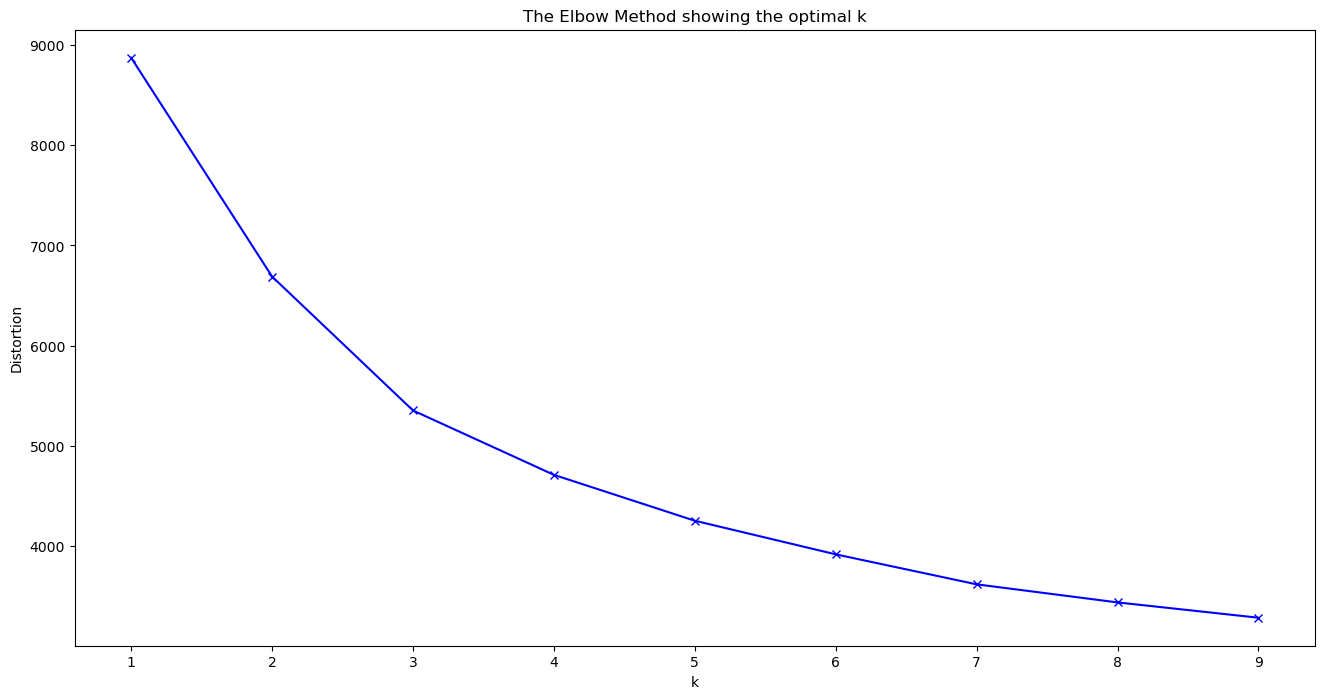

In [68]:
M = spotify_df[['popularity_red','energy','danceability','valence',
       'genre_new']]

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(M)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

#### KMeans clustering and using silhouette_score, calinski_harabasz_score as the evaluation metrics

Initialization complete
Iteration 0, inertia 161363.43996074854.
Iteration 1, inertia 109402.69979964472.
Iteration 2, inertia 103493.02163712474.
Iteration 3, inertia 100391.57007555387.
Iteration 4, inertia 98667.89501751061.
Iteration 5, inertia 97316.2198819014.
Iteration 6, inertia 96225.6197438627.
Iteration 7, inertia 95481.34143076345.
Iteration 8, inertia 95033.83516153763.
Iteration 9, inertia 94714.10529543176.
Iteration 10, inertia 94512.20805277719.
Iteration 11, inertia 94401.67848823372.
Iteration 12, inertia 94338.63907677885.
Iteration 13, inertia 94307.55263849166.
Iteration 14, inertia 94293.61732314949.
Iteration 15, inertia 94285.91264120728.
Iteration 16, inertia 94282.13354686726.
Iteration 17, inertia 94279.73921183159.
Iteration 18, inertia 94277.6759479275.
Iteration 19, inertia 94275.76986848009.
Iteration 20, inertia 94274.2884299787.
Converged at iteration 20: center shift 5.95965929286562e-05 within tolerance 9.999999999999583e-05.
Initialization complete


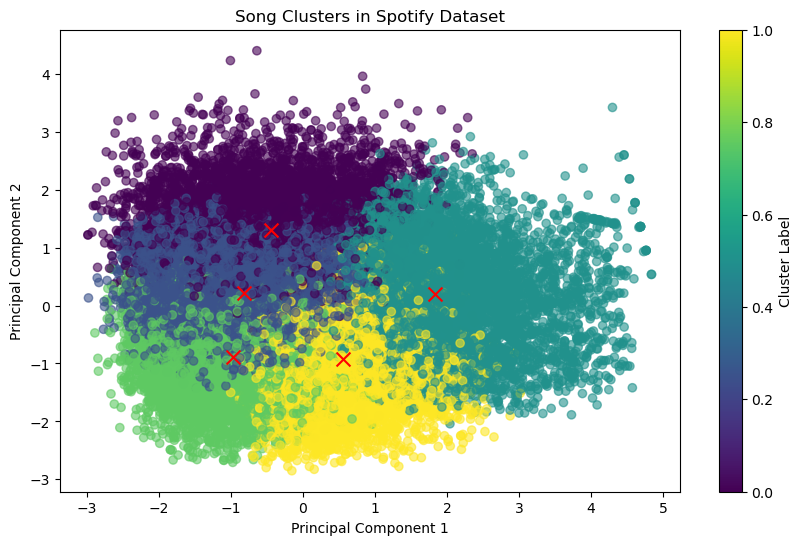

In [69]:
song_cluster_pipeline = Pipeline([('scaler', StandardScaler()), 
                                  ('kmeans', KMeans(n_clusters=5, 
                                   verbose=2))], verbose=False)
X = spotify_df[['popularity_red','energy','danceability','valence','genre_new']]
number_cols = list(X.columns)
song_cluster_pipeline.fit(X)

song_cluster_labels = song_cluster_pipeline.predict(X)
spotify_df['cluster_label'] = song_cluster_labels

# Evaluation metrics
X_scaled = song_cluster_pipeline.named_steps['scaler'].transform(X)  # Scaled features

# Silhouette Coefficient
silhouette_avg = silhouette_score(X_scaled, song_cluster_labels)
print("Silhouette Coefficient: ", silhouette_avg)

# Calinski-Harabasz Index
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, song_cluster_labels)
print("Calinski-Harabasz Index: ", calinski_harabasz_avg)

davies_bouldin = davies_bouldin_score(X_scaled, song_cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin}")


# Recommendations 
most_common_cluster = spotify_df['cluster_label'].value_counts().idxmax()
recommended_songs = spotify_df[spotify_df['cluster_label'] == most_common_cluster].sample(20)
print("Recommended Songs: \n", recommended_songs[['name']]);

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=song_cluster_labels, cmap='viridis', marker='o', alpha=0.6)

# plotting the centroids
if 'kmeans' in song_cluster_pipeline.named_steps:
    centroids = pca.transform(song_cluster_pipeline.named_steps['kmeans'].cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, marker='x')

plt.title('Song Clusters in Spotify Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


#The Silhouette Coefficient shows moderate performance and The Calinski-Harabasz Index suggests a good clustering structure.

## DBSCAN - Density-Based Spatial Clustering of Applications with Noise 

#### Performing hyperparameter tuning to find the best parameters.

In [70]:
X = spotify_df[['popularity_red', 'energy', 'danceability', 'valence', 'genre_new','speechiness', 'acousticness']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define a range of possible values for eps and min_samples
eps_values = np.arange(0.3, 1.0, 0.1)  # Example range, adjust based on your dataset
min_samples_values = range(2, 10)  # Example range, adjust as needed

# Initialize best score and parameters
best_score = -1
best_params = {'eps': None, 'min_samples': None}

# Loop through all possible combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN clustering
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X_scaled)
        
        # Only calculate the silhouette score if there are more than one cluster and noise points
        if len(set(labels)) > 1 and np.sum(labels != -1) > min_samples:
            score = silhouette_score(X_scaled, labels)
            
            if score > best_score:
                best_score = score
                best_params['eps'] = eps
                best_params['min_samples'] = min_samples

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.14138981335027193
Best Parameters: {'eps': 0.9000000000000001, 'min_samples': 9}


#### Using the best parameters to fit the DBSCAN algorithm

Silhouette Coefficient: 0.34008979278038926
Calinski-Harabasz Index: 55.041446917108686
Davies-Bouldin Index: 2.3005305953793607
                            id             name  popularity  explicit  \
110881  73JCugW0hKqzGYGwXHVzQ4       Dip It Low          53       0.0   
479124  4BPKtmSGGUyZoCxp73rlpK  Cuidame - Remix          52       1.0   
86314   4rsW3WCZBGwhHfJWuHRwyT             Home          69       0.0   
185419  0R7HFX1LW3E0ZR5BnAJLHz       Reflection          55       0.0   
397867  2mtB7ekPzvNoieI62jYeJD            Wing$          57       0.0   

        danceability  energy       key  loudness  speechiness  acousticness  \
110881      0.758829   0.722  1.000000  0.853417     0.107106      0.010843   
479124      0.743693   0.802  0.636364  0.827613     0.197734      0.153614   
86314       0.611504   0.826  0.000000  0.825379     0.031617      0.025703   
185419      0.360242   0.662  0.636364  0.760876     0.041813      0.003504   
397867      0.402624   0.599  0.27272

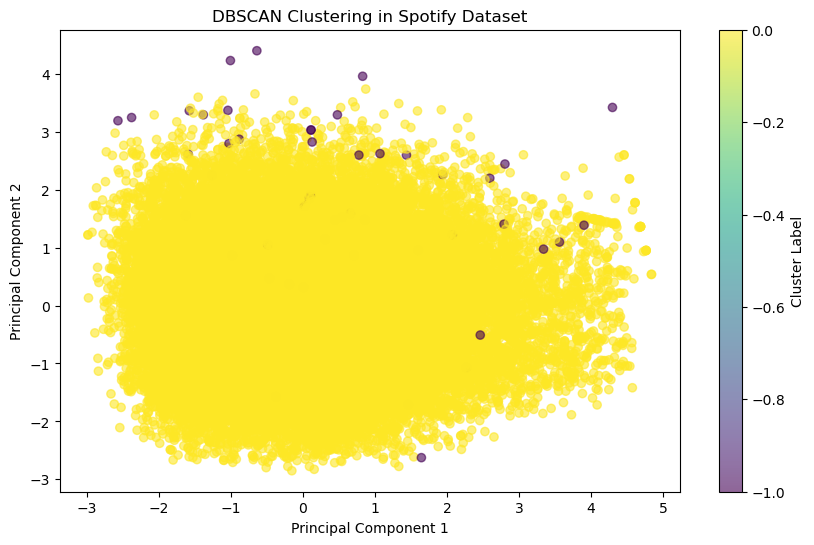

In [71]:
X = spotify_df[['popularity_red','energy','danceability','valence', 'genre_new']]
y = spotify_df['name']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
db = DBSCAN(eps=0.9, min_samples=9)  
db.fit(X_scaled)

# Add the cluster labels to the dataframe
spotify_df['cluster_label'] = db.labels_

# Calculate evaluation metrics
silhouette = silhouette_score(X_scaled, db.labels_)
calinski_harabasz = calinski_harabasz_score(X_scaled, db.labels_)
davies_bouldin = davies_bouldin_score(X_scaled, db.labels_)

print(f"Silhouette Coefficient: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# Function to get song recommendations based on clusters
def get_song_recommendations(song_id, spotify_df, num_recommendations=5):
    # Get the cluster label for the song
    song_cluster = spotify_df.loc[spotify_df['id'] == song_id, 'cluster_label'].iloc[0]
    
    # Filter songs from the same cluster
    same_cluster_songs = spotify_df[spotify_df['cluster_label'] == song_cluster]
    
    # If there are not enough songs in the cluster for recommendations, return what's available
    if len(same_cluster_songs) < num_recommendations:
        return same_cluster_songs
    
    # Recommend songs from the same cluster
    recommendations = same_cluster_songs.sample(n=num_recommendations)
    return recommendations

# Replace 'song_id' with the ID of the song for which you want to get recommendations
recommendations = get_song_recommendations(song_id='1HNkqx9Ahdgi1Ixy2xkKkL', spotify_df=spotify_df)
print(recommendations)

# Applying PCA for dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db.labels_, cmap='viridis', marker='o', alpha=0.6)

plt.title('DBSCAN Clustering in Spotify Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

#DBSCAN model has done a fair job at identifying clusters within the music dataset, but there might be room for improvement.